In [1]:
import numpy as np
import os
import pandas as pd
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.transform import resize
from scipy import stats


float64 (365, 279, 279)


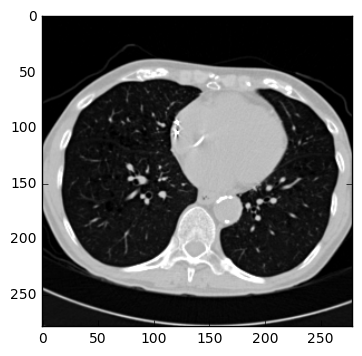

In [2]:
img = np.load('/workspace/dsbowl2017/data/preprocessing_images/0acbebb8d463b4b9ca88cf38431aac69.npy')
print(img.dtype, img.shape)
slice_1 = img[150]
# Show some slice in the middle
plt.imshow(slice_1, cmap=plt.cm.gray)
plt.show()

In [19]:
def shift(zoom_img, target_size, max_index):
    image_x_size = zoom_img.shape[1]
    image_y_size = zoom_img.shape[2]
    image_z_size = zoom_img.shape[0]
    if max_index == 0:
        shift_0 = 0
        shift_1 = int((target_size-image_x_size)/2)
        shift_2 = int((target_size-image_y_size)/2)
    elif max_index ==1:
        shift_0 = int((target_size-image_z_size)/2)
        shift_1 = 0
        shift_2 = int((target_size-image_y_size)/2)
    else:
        shift_0 = int((target_size-image_z_size)/2)
        shift_1 = int((target_size-image_x_size)/2)
        shift_2 = 0
    shift = (shift_0, shift_1, shift_2)
    
    return shift

In [16]:
max_size = np.max(img.shape)
print(max_size)
max_index = np.argmax(img.shape)
print(max_index)
print(img.shape[max_index])
target_size = 300.0
scale_ratio = target_size/max_size
zoom_image= scipy.ndimage.interpolation.zoom(img, scale_ratio, mode='nearest')
print(zoom_image.shape)
shift_all =shift(zoom_image, target_size, max_index)
shift_all[1]

365
0
365
(300, 229, 229)


35

In [17]:

zoom_image_mode = stats.mode(zoom_image[int(zoom_image.shape[max_index]/2*scale_ratio)].flatten())[0]


(300, 300, 300)
(300, 229, 229)


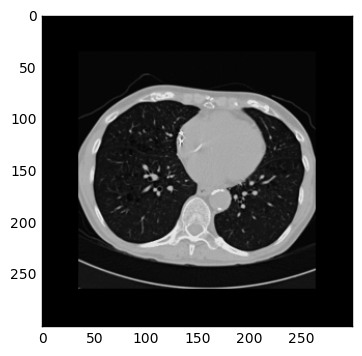

In [18]:
new_img = np.ndarray([300,300,300], dtype=np.float32)
new_img = new_img+zoom_image_mode
#np.ndarray([num_images,1,512,512],dtype=np.float32)
print(new_img.shape)
print(zoom_image.shape)
target_size = 300
image_x_size = zoom_image.shape[1]
image_y_size = zoom_image.shape[2]
image_z_size = zoom_image.shape[0]
new_img[shift_all[0]:shift_all[0]+image_z_size:,shift_all[1]:shift_all[1]+image_x_size,shift_all[2]:shift_all[2]+image_y_size]=zoom_image
slicezoom = new_img[int(150*scale_ratio)]
# Show some slice in the middle
plt.imshow(slicezoom, cmap=plt.cm.gray)
plt.show()

0.821917808219
[300, 229, 229]
(300, 229, 229)


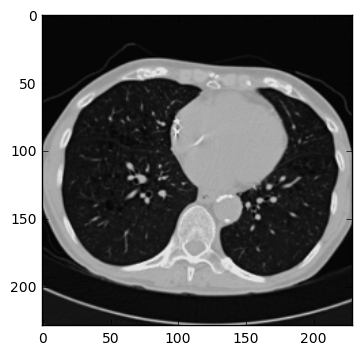

In [6]:
target_size = 300.0
scale_ratio = target_size/max_size
print(scale_ratio)
new_shape = [(i*scale_ratio).astype('int16') for i in img.shape]
print(new_shape)
zoom_image= scipy.ndimage.interpolation.zoom(img, scale_ratio, mode='nearest')
print(zoom_image.shape)
slice_1_zoom = zoom_image[int(150*scale_ratio)]
# Show some slice in the middle
plt.imshow(slice_1_zoom, cmap=plt.cm.gray)
plt.show()
resize_zoom_image = resize(zoom_image, [300,300,300])

(300, 300, 300)


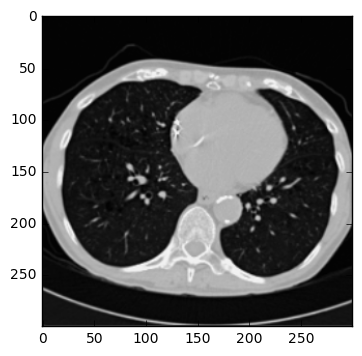

In [4]:
slice_1_resize_zoom = resize_zoom_image[int(150*scale_ratio)]
print(resize_zoom_image.shape)
# Show some slice in the middle
plt.imshow(slice_1_resize_zoom, cmap=plt.cm.gray)
plt.show()


In [26]:
def harmonize(img, target_size):
    max_size = np.max(img.shape)
    max_index = np.argmax(img.shape)
    scale_ratio = target_size/max_size
    zoom_image= scipy.ndimage.interpolation.zoom(img, scale_ratio, mode='nearest')
    image_x_size = zoom_image.shape[1]
    image_y_size = zoom_image.shape[2]
    image_z_size = zoom_image.shape[0]
    #resize_zoom_image = resize(zoom_image, [target_size,target_size,target_size])
    zoom_image_mode = stats.mode(zoom_image[int(zoom_image.shape[0]/2*scale_ratio)].flatten())[0]
    new_img = np.ndarray([target_size,target_size,target_size], dtype=np.float32)
    new_img = new_img+zoom_image_mode
    #np.ndarray([num_images,1,512,512],dtype=np.float32)
    print(new_img.shape)
    print(zoom_image.shape)
    shift_all =shift(zoom_image, target_size, max_index)
    new_img[shift_all[0]:shift_all[0]+image_z_size:,shift_all[1]:shift_all[1]+image_x_size,shift_all[2]:shift_all[2]+image_y_size]=zoom_image
    return new_img

In [24]:
res_img = harmonize(img, 300)

(300, 300, 300)
(300, 229, 229)


(300, 300, 300)


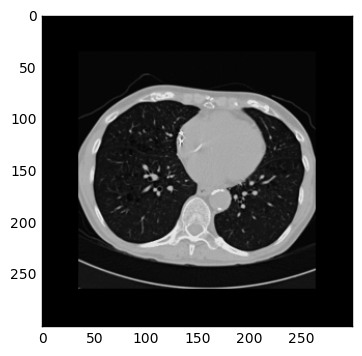

In [25]:
slice_res_img = res_img[int(150*scale_ratio)]
print(res_img.shape)
# Show some slice in the middle
plt.imshow(slice_res_img, cmap=plt.cm.gray)
plt.show()

In [45]:
print(slice_res_img)
print(slice_res_img[229:300,229:300])


[[-0.2524339 -0.2524339 -0.2524339 ..., -0.2524339 -0.2524339 -0.2524339]
 [-0.2524339 -0.2524339 -0.2524339 ..., -0.2524339 -0.2524339 -0.2524339]
 [-0.2524339 -0.2524339 -0.2524339 ..., -0.2524339 -0.2524339 -0.2524339]
 ..., 
 [-0.2524339 -0.2524339 -0.2524339 ..., -0.2524339 -0.2524339 -0.2524339]
 [-0.2524339 -0.2524339 -0.2524339 ..., -0.2524339 -0.2524339 -0.2524339]
 [-0.2524339 -0.2524339 -0.2524339 ..., -0.2524339 -0.2524339 -0.2524339]]
[[ 0.50506371  0.42628685  0.22357142 ..., -0.2524339  -0.2524339
  -0.2524339 ]
 [ 0.20783417 -0.03237183 -0.20780329 ..., -0.2524339  -0.2524339
  -0.2524339 ]
 [-0.19521385 -0.23581807 -0.22173265 ..., -0.2524339  -0.2524339
  -0.2524339 ]
 ..., 
 [-0.2524339  -0.2524339  -0.2524339  ..., -0.2524339  -0.2524339
  -0.2524339 ]
 [-0.2524339  -0.2524339  -0.2524339  ..., -0.2524339  -0.2524339
  -0.2524339 ]
 [-0.2524339  -0.2524339  -0.2524339  ..., -0.2524339  -0.2524339
  -0.2524339 ]]


In [48]:
tmp = zoom_image.flatten()

Help on built-in function bincount in module numpy.core.multiarray:

bincount(...)
    bincount(x, weights=None, minlength=None)
    
    Count number of occurrences of each value in array of non-negative ints.
    
    The number of bins (of size 1) is one larger than the largest value in
    `x`. If `minlength` is specified, there will be at least this number
    of bins in the output array (though it will be longer if necessary,
    depending on the contents of `x`).
    Each bin gives the number of occurrences of its index value in `x`.
    If `weights` is specified the input array is weighted by it, i.e. if a
    value ``n`` is found at position ``i``, ``out[n] += weight[i]`` instead
    of ``out[n] += 1``.
    
    Parameters
    ----------
    x : array_like, 1 dimension, nonnegative ints
        Input array.
    weights : array_like, optional
        Weights, array of the same shape as `x`.
    minlength : int, optional
        A minimum number of bins for the output array.
   

In [78]:
idx = np.random.choice(np.arange(zoom_image.shape[0]), 10)

In [79]:
backgroun_samples = [stats.mode(zoom_image[i].flatten()) for i in idx]

In [89]:
zoom_image_mode = np.median(np.array([bg[0][0] for bg in backgroun_samples]))

In [44]:
zoom_image_mode = stats.mode(zoom_image[int(zoom_image.shape[0]/2*scale_ratio)].flatten())[0]
print(zoom_image_mode)
print(zoom_image_mode[1])

ModeResult(mode=array([-0.27806325]), count=array([1]))
[1]


In [40]:
a = np.array([[[ 1,  1,  1,  3,  4],
                  [ 5,  6,  7,  8,  9],
                  [10, 11, 12, 13, 14],
                  [15, 16, 17, 18, 19]],

                 [[ 0,  1,  2,  3,  4],
                  [ 5,  6,  7,  8,  9],
                  [10, 11, 12, 13, 14],
                  [15, 16, 17, 18, 19]],

                 [[40, 40, 42, 43, 44],
                  [45, 46, 47, 48, 49],
                  [50, 51, 52, 53, 54],
                  [55, 56, 57, 58, 59]]])

mode= stats.mode(a.flatten())
print(a.shape,mode[0])
print(stats.mode(a.flatten())[0])

(3, 4, 5) [1]
[1]


(300, 300, 300)
(300, 229, 229)


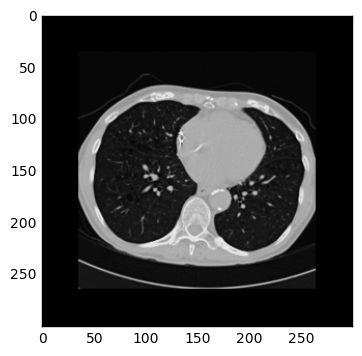

In [90]:
new_img = np.ndarray([300,300,300], dtype=np.float32)
new_img = new_img+zoom_image_mode
#np.ndarray([num_images,1,512,512],dtype=np.float32)
print(new_img.shape)
print(zoom_image.shape)
target_size = 300
image_x_size = zoom_image.shape[1]
image_y_size = zoom_image.shape[2]
shift = int((target_size-image_x_size)/2)
new_img[:,shift:shift+image_x_size,shift:shift+image_y_size]=zoom_image
slicezoom = new_img[int(150*scale_ratio)]
# Show some slice in the middle
plt.imshow(slicezoom, cmap=plt.cm.gray)
plt.show()